## Технологии машинного обучения

## Практическая 2. Exploratory Data Analysis и линейная регрессия

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе практического задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [ ]:
!wget -O 'train.zip' -q 'https://www.dropbox.com/s/su32w39z76wdtj8/train.zip?dl=0'

In [ ]:
df = pd.read_csv('/content/train.zip', compression='zip')

In [ ]:
df.head(5)

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [ ]:
df.drop('dropoff_datetime', axis=1, inplace=True)

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
df.head(5)

id  vendor_id     pickup_datetime  passenger_count  \
0  id2875421          2 2016-03-14 17:24:55                1   
1  id2377394          1 2016-06-12 00:43:35                1   
2  id3858529          2 2016-01-19 11:35:24                1   
3  id3504673          2 2016-04-06 19:32:31                1   
4  id2181028          2 2016-03-26 13:30:55                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0                  N            455  
1                  N            663  
2                  N           2124  
3                  N            429  
4                  N            435

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

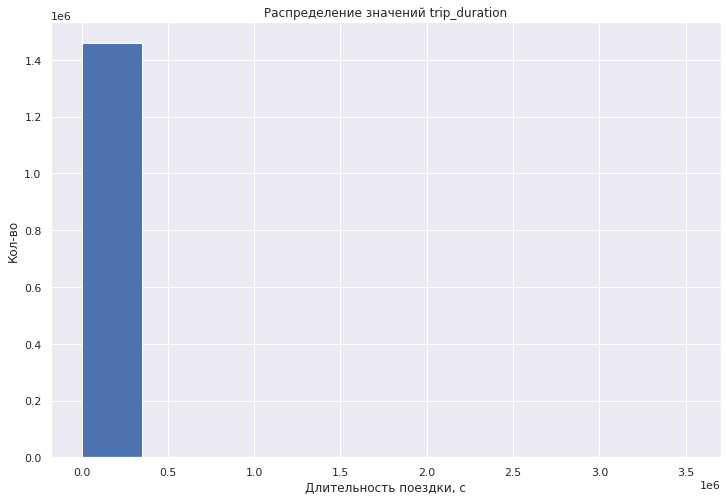

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(df['trip_duration'])
plt.xlabel('Длительность поездки, с')
plt.ylabel('Кол-во')
plt.title('Распределение значений trip_duration')
plt.show()

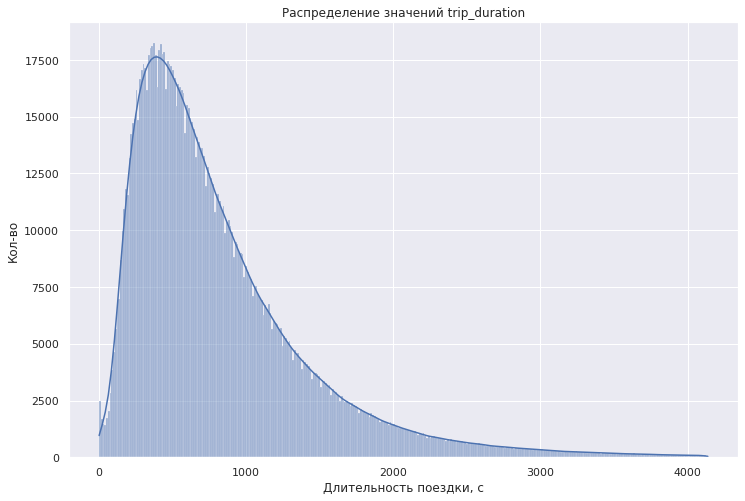

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['trip_duration'][df['trip_duration'] < np.quantile(df['trip_duration'], 0.995)], kde=True)
plt.xlabel('Длительность поездки, с')
plt.ylabel('Кол-во')
plt.title('Распределение значений trip_duration')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ:** Значения разбросаны достаточно сильно (от нескольких секунд до нескольких десятков часов), есть выбросы.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:** Возможно, главная причина - необходимость снизить влияние выбросов\большого диапазона на значения функции ошибки.

Сведем задачу оптимизации RMSLE к MSE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [ ]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df.drop('trip_duration', axis=1, inplace=True)

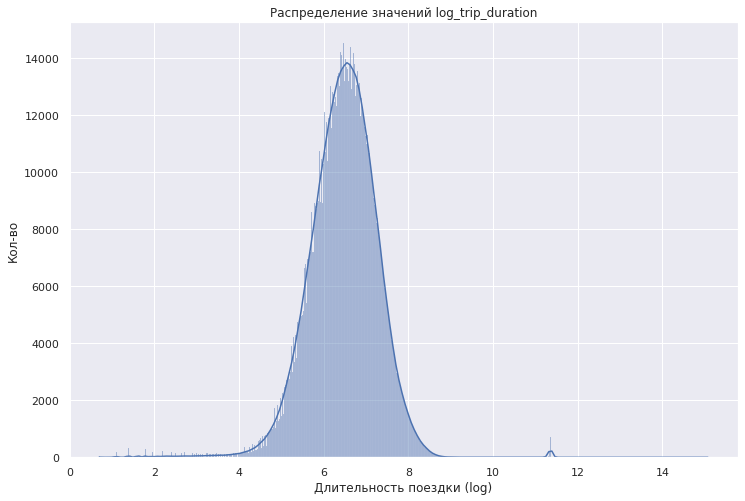

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df['log_trip_duration'], kde=True)
plt.xlabel('Длительность поездки (log)')
plt.ylabel('Кол-во')
plt.title('Распределение значений log_trip_duration')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [ ]:
mean_target = df['log_trip_duration'].mean()
length_target = df['log_trip_duration'].shape
baseline = np.full(length_target, mean_target)

In [ ]:
from sklearn.metrics import mean_squared_error

metric = mean_squared_error(df['log_trip_duration'], baseline, squared=False)

In [ ]:
print(f'RMSE: {metric}')

RMSE: 0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

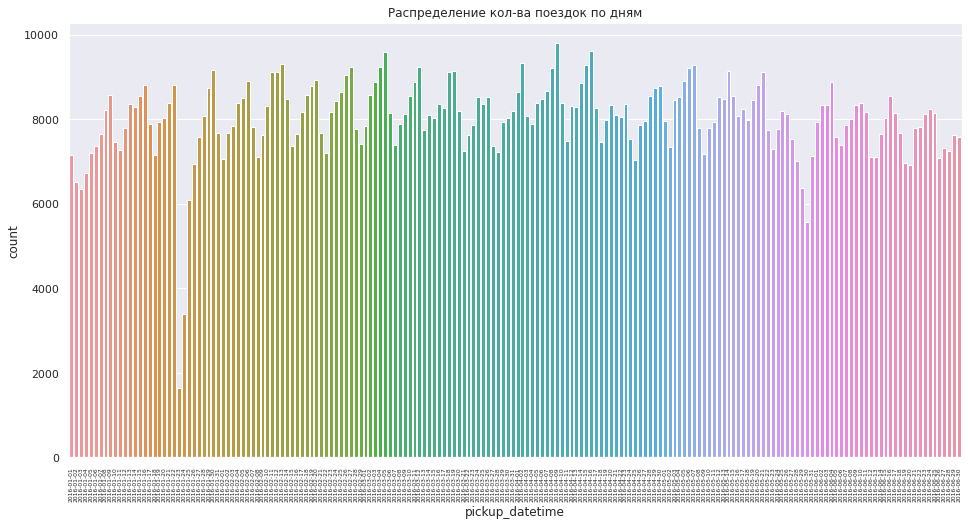

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['pickup_datetime'].dt.date.sort_values())
plt.xticks(rotation=90, fontsize=6)
plt.title('Распределение кол-ва поездок по дням')
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

**Ответ:** 23-24 января в Нью-Йорке была снежная буря

https://www.nbcnewyork.com/news/local/nyc-new-york-city-blizzard-biggest-ever-january-23-2016/831660/

29-30 мая - День Памяти 

https://www.cbsnews.com/newyork/news/memorial-day-new-york-city/

In [ ]:
time_df = pd.DataFrame()
time_df['id'] = df['id']
time_df['dates'] = df['pickup_datetime'].dt.date
time_df['months'] = df['pickup_datetime'].dt.month
time_df['hours'] = df['pickup_datetime'].dt.hour
time_df['weekday'] = df['pickup_datetime'].dt.day_of_week

In [ ]:
df['pickup_datetime'].dt.day_of_week

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int64

In [ ]:
count = time_df.groupby(['dates', 'hours', 'weekday', 'months']).count()[['id']].rename(columns={'id': 'count'})

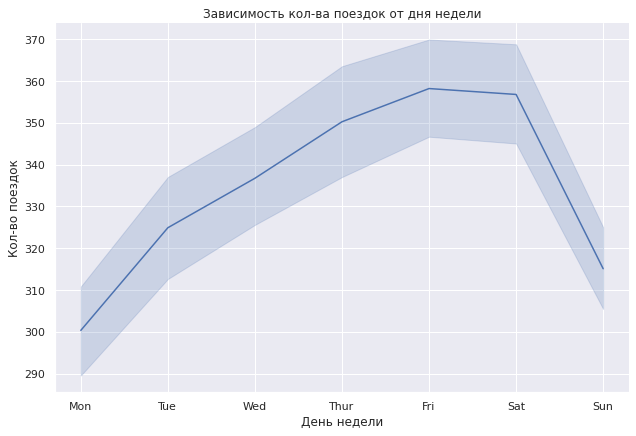

In [ ]:
sns.relplot(data=count, x='weekday', y='count', kind='line', height=6, aspect=1.5)
plt.xlabel('День недели')
plt.ylabel('Кол-во поездок')
plt.title('Зависимость кол-ва поездок от дня недели')
plt.xticks(np.arange(7), ('Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

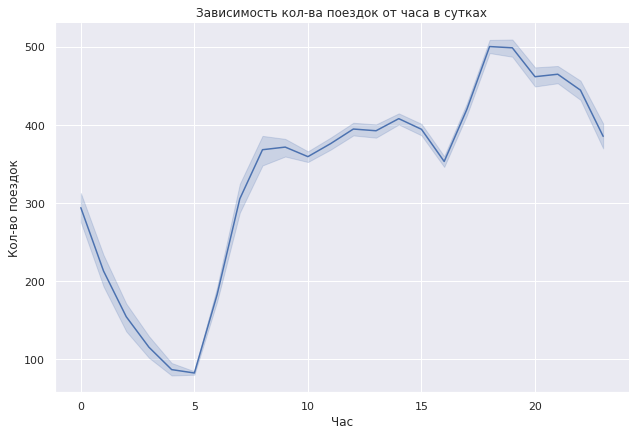

In [ ]:
sns.relplot(data=count, x='hours', y='count', kind='line', height=6, aspect=1.5)
plt.xlabel('Час')
plt.ylabel('Кол-во поездок')
plt.title('Зависимость кол-ва поездок от часа в сутках')
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

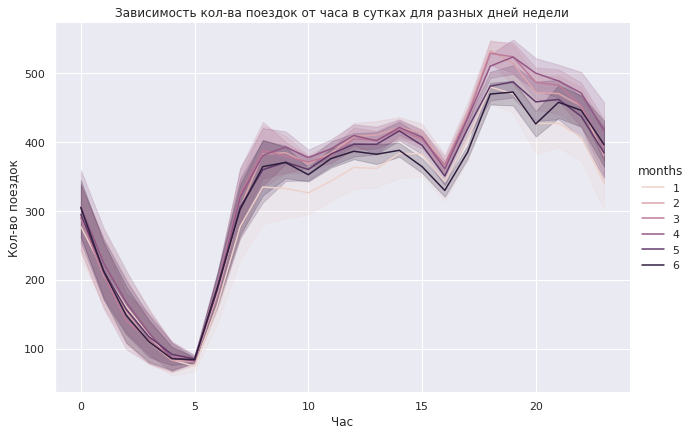

In [ ]:
sns.relplot(data=count, x='hours', y='count', kind='line', hue='months', height=6, aspect=1.5)
plt.xlabel('Час')
plt.ylabel('Кол-во поездок')
plt.title('Зависимость кол-ва поездок от часа в сутках для разных дней недели')
plt.show()

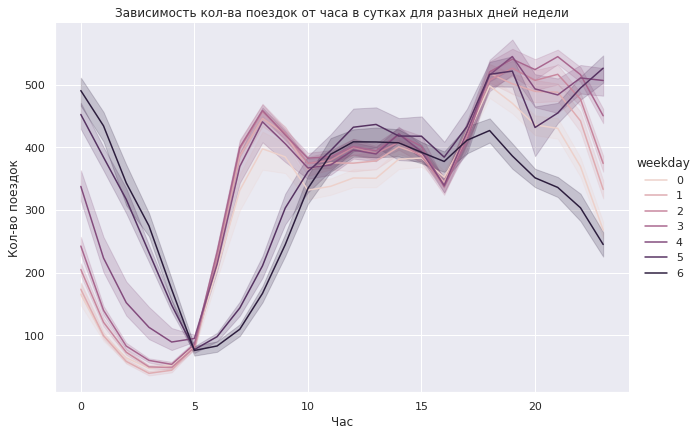

In [ ]:
sns.relplot(data=count, x='hours', y='count', kind='line', hue='weekday', height=6, aspect=1.5)
plt.xlabel('Час')
plt.ylabel('Кол-во поездок')
plt.title('Зависимость кол-ва поездок от часа в сутках для разных дней недели')
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Минимальное кол-во поездок наблюдается в понедельник, максимальное - в пятницу, при этом оно плавно растет с понедельника по пятницу. В выходные кол-во поездок снижается и особенно сильно падает в воскресенье. Что касается времени суток, в 5 утра кол-во поездок минимально. От 5 до 8 часов утра наблюдается сильный рост. Час-пик - в конце рабочего дня (17-18 часов). В июне и январе меньше поездок, что может быть связано с отпусками. В выходные дни кол-во ночных поездок выше, а в период с 5 до 10 утра - наоборот, что свидетельствует о проведении свободного времени вне дома во время выходных.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3. По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

In [ ]:
time_df_train = pd.DataFrame()
time_df_train['id'] = X_train['id']
time_df_train['log_trip_duration'] = X_train['log_trip_duration']
time_df_train['day_of_year'] = X_train['pickup_datetime'].dt.day_of_year
time_df_train['hours'] = X_train['pickup_datetime'].dt.hour
time_df_train['weekday'] = X_train['pickup_datetime'].dt.day_of_week

In [ ]:
count_train = time_df_train.groupby(['day_of_year', 'hours', 'weekday']).mean()[['log_trip_duration']].rename(columns={'id': 'count'})

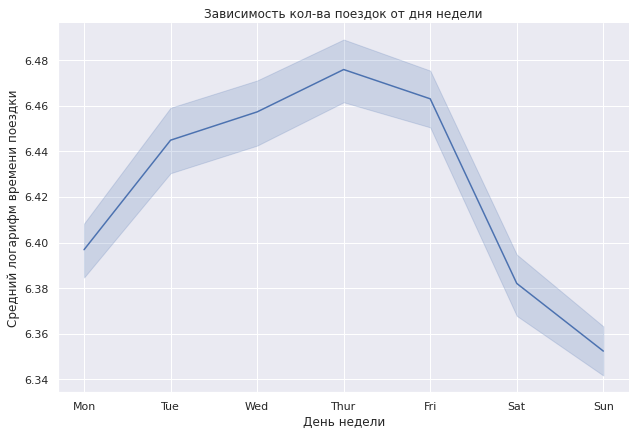

In [ ]:
sns.relplot(data=count_train, x='weekday', y='log_trip_duration', kind='line', height=6, aspect=1.5)
plt.xlabel('День недели')
plt.ylabel('Cредний логарифм времени поездки')
plt.title('Зависимость кол-ва поездок от дня недели')
plt.xticks(np.arange(7), ('Mon', 'Tue','Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.show()

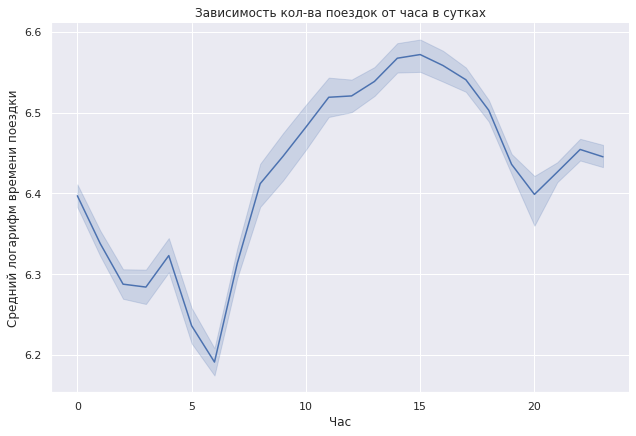

In [ ]:
sns.relplot(data=count_train, x='hours', y='log_trip_duration', kind='line', height=6, aspect=1.5)
plt.xlabel('Час')
plt.ylabel('Cредний логарифм времени поездки')
plt.title('Зависимость кол-ва поездок от часа в сутках')
plt.show()

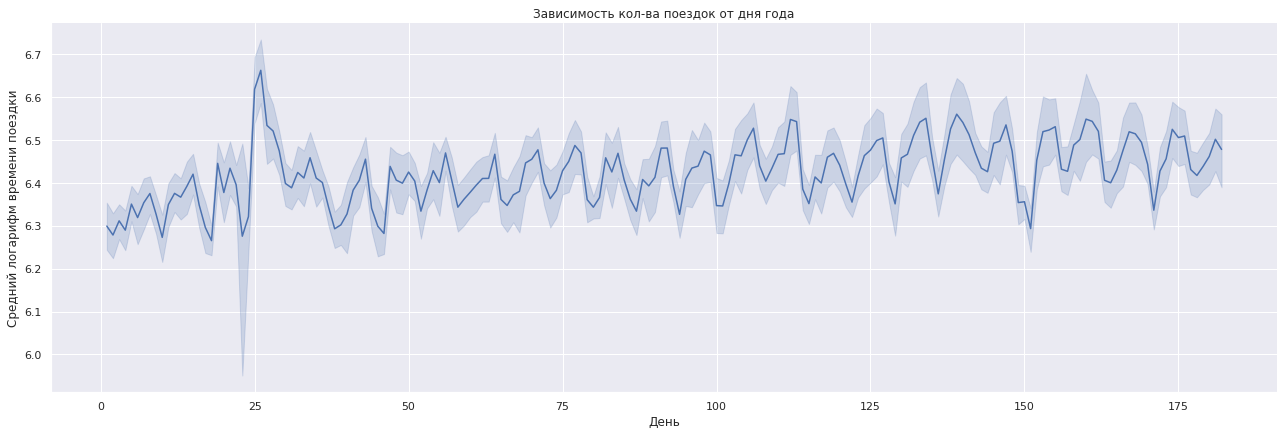

In [ ]:
sns.relplot(data=count_train, x='day_of_year', y='log_trip_duration', kind='line', height=6, aspect=3)
plt.xlabel('День')
plt.ylabel('Cредний логарифм времени поездки')
plt.title('Зависимость кол-ва поездок от дня года')
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: В целом, наблюдается некоторое сходство. Большая продолжительность поездки, как и кол-во поездок, наблюдается в дневное время в будни, что может говорить о том, что большинство пользователей такси живут удаленно от места работы.

В первый аномальный период длительность поездок увеличилась (пробки), во второй - уменьшилась (возможно, люди в основном брали такси, чтобы доехать до места проведения мероприятий).

На графике зависимости log_trip_duration от номера дня в году наблюдается очень слабый восходящий тренд до лета, далее идет слабое снижение.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [ ]:
X_train['weekday'] = X_train['pickup_datetime'].dt.day_of_week
X_train['months'] = X_train['pickup_datetime'].dt.month
X_train['hours'] = X_train['pickup_datetime'].dt.hour
X_train['day_of_year'] = X_train['pickup_datetime'].dt.day_of_year
X_train['is_anomaly_first'] = 0
X_train['is_anomaly_second'] = 0
X_train.loc[X_train['day_of_year'].isin((25, 26, 27)), 'is_anomaly_first'] = 1
X_train.loc[X_train['day_of_year'].isin((149, 150, 151)), 'is_anomaly_second'] = 1

In [ ]:
X_test['weekday'] = X_test['pickup_datetime'].dt.day_of_week
X_test['months'] = X_test['pickup_datetime'].dt.month
X_test['hours'] = X_test['pickup_datetime'].dt.hour
X_test['day_of_year'] = X_test['pickup_datetime'].dt.day_of_year
X_test['is_anomaly_first'] = 0
X_test['is_anomaly_second'] = 0
X_test.loc[X_test['day_of_year'].isin((25, 26, 27)), 'is_anomaly_first'] = 1
X_test.loc[X_test['day_of_year'].isin((149, 150, 151)), 'is_anomaly_second'] = 1

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: Признаки 'hours' и 'day_of_year' можно рассмотреть как числовые, а 'weekday', 'months', 'is_anomaly_first', 'is_anomaly_second' - как категориальные.

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [ ]:
y_train, X_train = X_train['log_trip_duration'], X_train.drop('log_trip_duration', axis=1)
y_test, X_test = X_test['log_trip_duration'], X_test.drop('log_trip_duration', axis=1)

In [ ]:
X_train.head()

id  vendor_id     pickup_datetime  passenger_count  \
430252   id2968130          2 2016-02-15 00:52:17                2   
598829   id2358444          2 2016-03-22 12:04:34                2   
314731   id0408430          2 2016-03-14 16:03:08                1   
1342009  id2305944          2 2016-01-14 12:02:41                1   
673814   id2198653          1 2016-06-26 23:10:20                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
430252         -73.934586        40.797016         -73.917397   
598829         -73.957748        40.764500         -73.978706   
314731         -73.982857        40.730961         -73.980171   
1342009        -73.982262        40.771389         -73.979973   
673814         -73.991264        40.749748         -73.976517   

         dropoff_latitude store_and_fwd_flag  weekday  months  hours  \
430252          40.834545                  N        0       2      0   
598829          40.758430                  N        1       3     12   
314731          40.734741                  N        0       3     16   
1342009         40.786072                  N        3       1     12   
673814          40.749260                  N        6       6     23   

         day_of_year  is_anomaly_first  is_anomaly_second  
430252            46                 0                  0  
598829            82                 0                  0  
314731            74                 0                  0  
1342009           14                 0                  0  
673814           178                 0                  0

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


X_train_time = X_train[['hours', 'day_of_year', 'weekday', 'months', 'is_anomaly_first', 'is_anomaly_second']]
X_test_time = X_test[['hours', 'day_of_year', 'weekday', 'months', 'is_anomaly_first', 'is_anomaly_second']]

cat = ['weekday', 'months', 'is_anomaly_first', 'is_anomaly_second']
num = ['hours', 'day_of_year']

column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Ridge())
])

model = pipeline.fit(X_train_time, y_train)
y_pred = model.predict(X_test_time)

In [ ]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.789751423996954


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [ ]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [ ]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Два аэропорта: Кеннеди и Ла-Гвардия(?)

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [ ]:
def haversine(lng1, lat1, lng2, lat2):
    lng1, lat1, lng2, lat2 = map(np.radians, (lng1, lat1, lng2, lat2))
    EARTH_R = 6371
    lng = lng2 - lng1
    lat = lat2 - lat1
    D = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    res = 2 * EARTH_R * np.arcsin(np.sqrt(D))
    return res

In [ ]:
X_train['haversine'] = haversine(X_train['pickup_longitude'], X_train['pickup_latitude'], X_train['dropoff_longitude'], X_train['dropoff_latitude'])
X_test['haversine'] = haversine(X_test['pickup_longitude'], X_test['pickup_latitude'], X_test['dropoff_longitude'], X_test['dropoff_latitude'])

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [ ]:
X_train['log_haversine'] = np.log1p(X_train['haversine'])
X_test['log_haversine'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

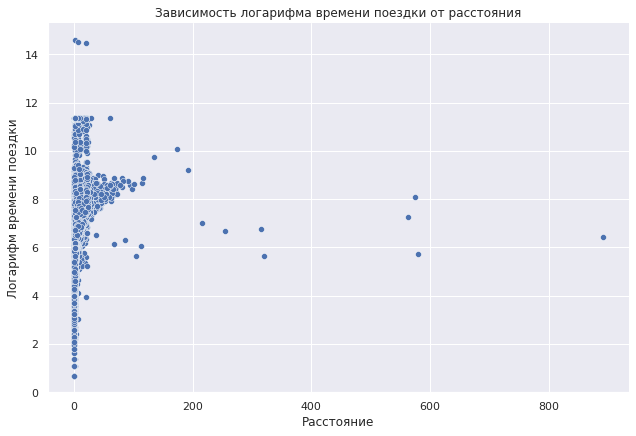

In [ ]:
sns.relplot(x=X_train['haversine'], y=y_train, height=6, aspect=1.5)
plt.xlabel('Расстояние')
plt.ylabel('Логарифм времени поездки')
plt.title('Зависимость логарифма времени поездки от расстояния')
plt.show()

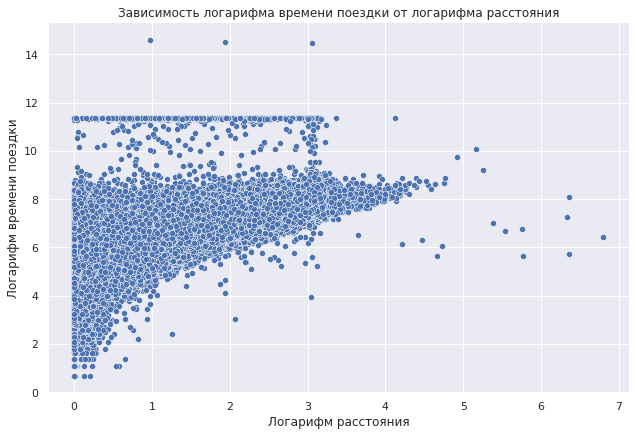

In [ ]:
sns.relplot(x=X_train['log_haversine'], y=y_train, height=6, aspect=1.5)
plt.xlabel('Логарифм расстояния')
plt.ylabel('Логарифм времени поездки')
plt.title('Зависимость логарифма времени поездки от логарифма расстояния')
plt.show()

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [ ]:
X_train['avg_speed'] = X_train['haversine'] / (np.expm1(y_train)/3600)

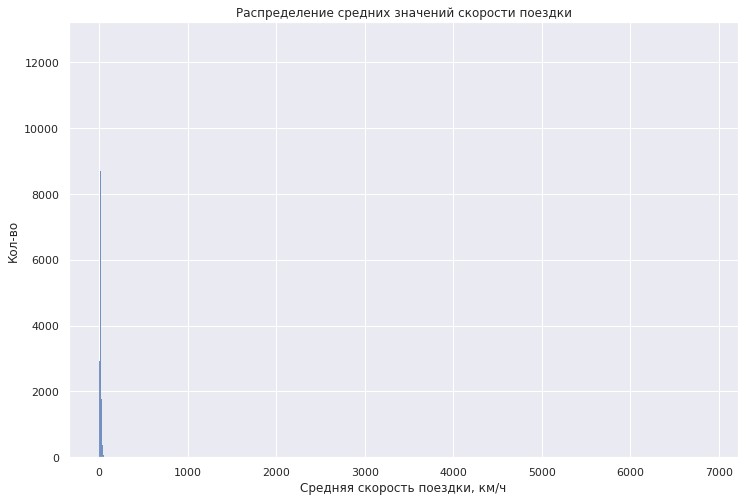

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['avg_speed'])
plt.xlabel('Средняя скорость поездки, км/ч')
plt.ylabel('Кол-во')
plt.title('Распределение средних значений скорости поездки')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

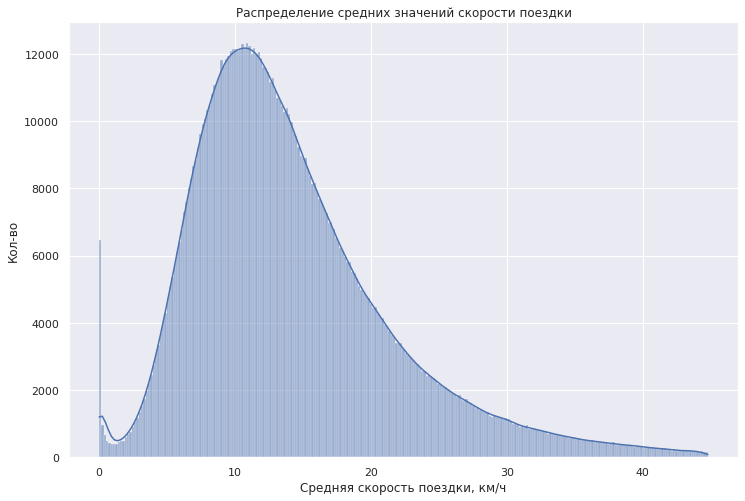

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['avg_speed'][X_train['avg_speed'] < np.quantile(X_train['avg_speed'], 0.995)], kde=True)
plt.xlabel('Средняя скорость поездки, км/ч')
plt.ylabel('Кол-во')
plt.title('Распределение средних значений скорости поездки')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [ ]:
weekday_hour = X_train.groupby(['weekday', 'hours']).median()['avg_speed']

In [ ]:
weekday_hour = weekday_hour.reset_index().pivot(columns='weekday', index='hours', values='avg_speed')

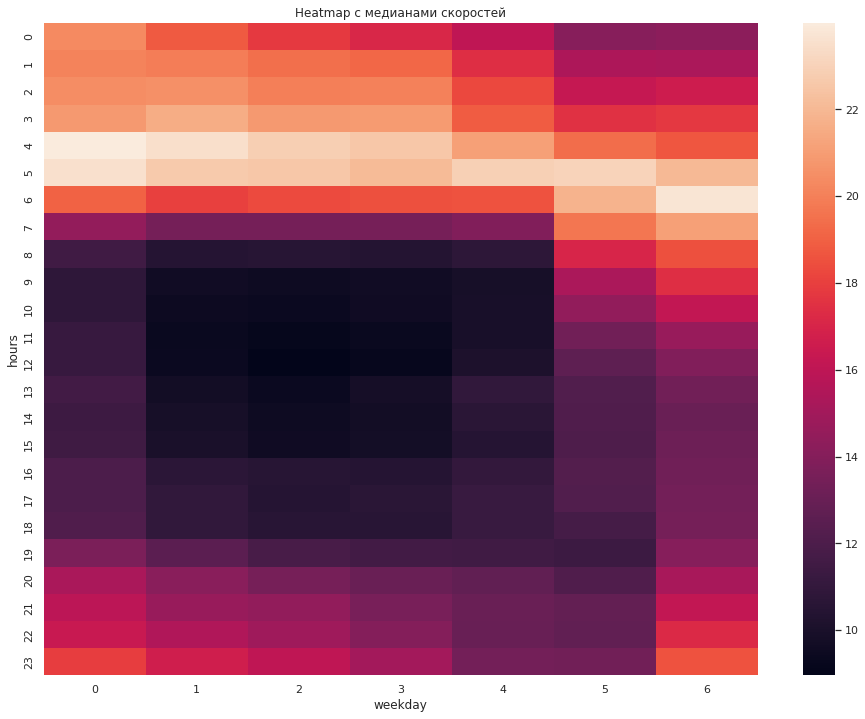

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(weekday_hour)
plt.title('Heatmap с медианами скоростей')
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Так как скорость напрямую коррелирует с нашим таргетом.

In [ ]:
X_train.drop('avg_speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость максимальна в период с 4 до 5 часов утра в понедельник, и в 6 утра в воскресенье. Минимальна в среду в полдень.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [ ]:
X_train['traffic_jam'] = 0
X_train['free_road'] = 0

X_train.loc[
    
    ((X_train['hours'].isin([i for i in range(8, 19)])) &
    (X_train['weekday'].isin([i for i in range(0, 5)]))) |

    ((X_train['hours'].isin([19])) &
    (X_train['weekday'].isin([i for i in range(2, 6)]))),

    'traffic_jam'

] = 1

X_train.loc[
    
    ((X_train['hours'].isin([i for i in range(0, 6)])) &
    (X_train['weekday'].isin([0]))) |

    ((X_train['hours'].isin([i for i in range(1, 6)])) &
    (X_train['weekday'].isin([i for i in range(1, 4)]))) |

    ((X_train['hours'].isin([i for i in range(4, 6)])) &
    (X_train['weekday'].isin([4]))) |

    ((X_train['hours'].isin([i for i in range(5, 7)])) &
    (X_train['weekday'].isin([i for i in range(5, 7)]))),

    'free_road'

] = 1



X_test['traffic_jam'] = 0
X_test['free_road'] = 0

X_test.loc[
    
    ((X_test['hours'].isin([i for i in range(8, 19)])) &
    (X_test['weekday'].isin([i for i in range(0, 5)]))) |

    ((X_test['hours'].isin([19])) &
    (X_test['weekday'].isin([i for i in range(2, 6)]))),

    'traffic_jam'

] = 1

X_test.loc[
    
    ((X_test['hours'].isin([i for i in range(0, 6)])) &
    (X_test['weekday'].isin([0]))) |

    ((X_test['hours'].isin([i for i in range(1, 6)])) &
    (X_test['weekday'].isin([i for i in range(1, 4)]))) |

    ((X_test['hours'].isin([i for i in range(4, 6)])) &
    (X_test['weekday'].isin([4]))) |

    ((X_test['hours'].isin([i for i in range(5, 7)])) &
    (X_test['weekday'].isin([i for i in range(5, 7)]))),

    'free_road'

] = 1

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [ ]:
X_train['first_started'] = 0
X_train['second_started'] = 0
X_train['first_finished'] = 0
X_train['second_finished'] = 0

X_train.loc[
    (X_train['pickup_latitude'] > 40.627) &
    (X_train['pickup_latitude'] < 40.659) &
    (X_train['pickup_longitude'] > -73.823) &
    (X_train['pickup_longitude'] < -73.760),
    'first_started'
] = 1

X_train.loc[
    (X_train['dropoff_latitude'] > 40.627) &
    (X_train['dropoff_latitude'] < 40.659) &
    (X_train['dropoff_longitude'] > -73.823) &
    (X_train['dropoff_longitude'] < -73.760),
    'first_finished'
] = 1

X_train.loc[
    (X_train['pickup_latitude'] > 40.768) &
    (X_train['pickup_latitude'] < 40.783) &
    (X_train['pickup_longitude'] > -73.880) &
    (X_train['pickup_longitude'] < -73.855),
    'second_started'
] = 1

X_train.loc[
    (X_train['dropoff_latitude'] > 40.768) &
    (X_train['dropoff_latitude'] < 40.783) &
    (X_train['dropoff_longitude'] > -73.880) &
    (X_train['dropoff_longitude'] < -73.855),
    'second_finished'
] = 1



X_test['first_started'] = 0
X_test['second_started'] = 0
X_test['first_finished'] = 0
X_test['second_finished'] = 0

X_test.loc[
    (X_test['pickup_latitude'] > 40.627) &
    (X_test['pickup_latitude'] < 40.659) &
    (X_test['pickup_longitude'] > -73.823) &
    (X_test['pickup_longitude'] < -73.760),
    'first_started'
] = 1

X_test.loc[
    (X_test['dropoff_latitude'] > 40.627) &
    (X_test['dropoff_latitude'] < 40.659) &
    (X_test['dropoff_longitude'] > -73.823) &
    (X_test['dropoff_longitude'] < -73.760),
    'first_finished'
] = 1

X_test.loc[
    (X_test['pickup_latitude'] > 40.768) &
    (X_test['pickup_latitude'] < 40.783) &
    (X_test['pickup_longitude'] > -73.880) &
    (X_test['pickup_longitude'] < -73.855),
    'second_started'
] = 1

X_test.loc[
    (X_test['dropoff_latitude'] > 40.768) &
    (X_test['dropoff_latitude'] < 40.783) &
    (X_test['dropoff_longitude'] > -73.880) &
    (X_test['dropoff_longitude'] < -73.855),
    'second_finished'
] = 1

In [ ]:
first_started = X_train[X_train['first_started'] == 1]
first_finished = X_train[X_train['first_finished'] == 1]

second_started = X_train[X_train['second_started'] == 1]
second_finished = X_train[X_train['second_finished'] == 1]

In [ ]:
show_circles_on_map(first_started.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(first_finished.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

In [ ]:
show_circles_on_map(second_started.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [ ]:
show_circles_on_map(second_finished.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

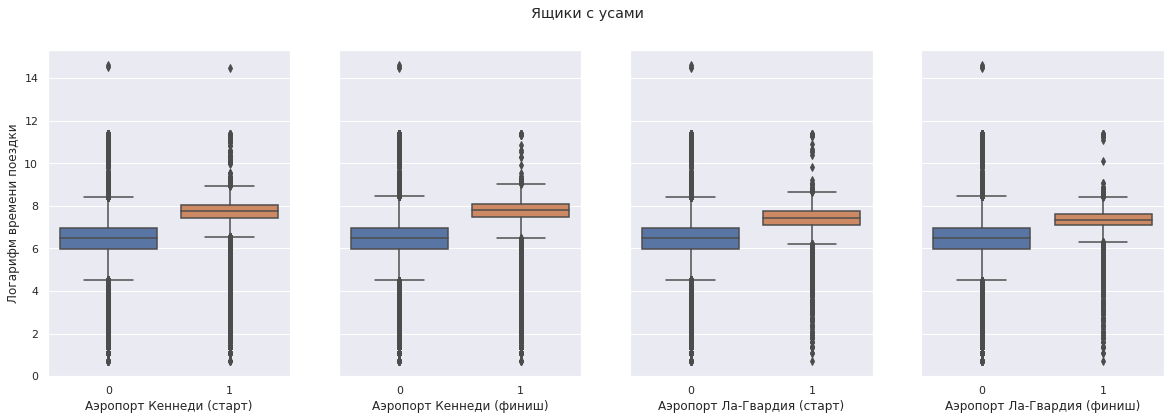

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20,6))

sns.boxplot(data=X_train, x='first_started', y=y_train, ax=axs[0])
axs[0].set_ylabel('Логарифм времени поездки')
axs[0].set_xlabel('Аэропорт Кеннеди (старт)')

sns.boxplot(data=X_train, x='first_finished', y=y_train, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[1].set_xlabel('Аэропорт Кеннеди (финиш)')

sns.boxplot(data=X_train, x='second_started', y=y_train, ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_yticklabels('')
axs[2].set_xlabel('Аэропорт Ла-Гвардия (старт)')

sns.boxplot(data=X_train, x='second_finished', y=y_train, ax=axs[3])
axs[3].set_ylabel('')
axs[3].set_yticklabels('')
axs[3].set_xlabel('Аэропорт Ла-Гвардия (финиш)')

fig.suptitle('Ящики с усами')
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Между двумя классами для обоих аэропортов и стартовых/конечных точек есть различия, но также присутсвует большое кол-во выбросов. Поэтому признаки, скорее всего, получились не очень качественными.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [ ]:
X_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'weekday', 'months', 'hours',
       'day_of_year', 'is_anomaly_first', 'is_anomaly_second', 'haversine',
       'log_haversine', 'traffic_jam', 'free_road', 'first_started',
       'second_started', 'first_finished', 'second_finished'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, lng1, lat1, lng2, lat2, cols=4, rows=6, y=None):
        self.lng1 = lng1
        self.lat1 = lat1
        self.lng2 = lng2
        self.lat2 = lat2
        self.cols = cols
        self.rows = rows

        lngs = np.linspace(self.lng1, self.lng2, self.cols + 1)
        lats = np.linspace(self.lat1, self.lat2, self.rows + 1)

        grid = np.array([])
        for i in range(len(lngs) - 1):
            for j in range(len(lats) - 1):
                grid = np.append(grid, [lngs[i], lats[j], lngs[i+1], lats[j+1]])

        self.grid = grid.reshape(-1, 4)

        return self

    def transform(self, X, y=None):
        X = X.copy()
        X['start_zone'] = -1
        X['finish_zone'] = -1

        for i in range(self.cols * self.rows):
            X.loc[
                (self.grid[i][0] < X['pickup_longitude']) &
                (self.grid[i][2] > X['pickup_longitude']) &
                (self.grid[i][1] < X['pickup_latitude']) &
                (self.grid[i][3] > X['pickup_latitude']),
                'start_zone'
            ] = i
            

            X.loc[
                (self.grid[i][0] < X['dropoff_longitude']) &
                (self.grid[i][2] > X['dropoff_longitude']) &
                (self.grid[i][1] < X['dropoff_latitude']) &
                (self.grid[i][3] > X['dropoff_latitude']),
                'finish_zone'
            ] = i

        return X

In [ ]:
show_circles_on_map(df[
    (df['pickup_longitude'] > -74.021) &
    (df['pickup_longitude'] < -73.938) &
    (df['pickup_latitude'] > 40.700) &
    (df['pickup_latitude'] < 40.803)
    ].sample(1000),
    "pickup_latitude",
    "pickup_longitude",
    "blue")

In [ ]:
map_grid = MapGridTransformer()
map_grid.fit(X_train, -74.021, 40.700, -73.938, 40.803)
X_train = map_grid.transform(X_train)
X_test = map_grid.transform(X_test)

In [ ]:
X_train['start_zone'].value_counts()

 8     159620
 15    150953
 9     124482
 7      94819
-1      86792
 22     67179
 16     52706
 2      42977
 1      41995
 10     40819
 0      38984
 14     36560
 17     35592
 21     14759
 23     11217
 3       5184
 6       4642
 13      4519
 18      2339
 20      1592
 19      1494
 12      1380
 11       428
 4         14
 5          4
Name: start_zone, dtype: int64

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [ ]:
X_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
weekday                        int64
months                         int64
hours                          int64
day_of_year                    int64
is_anomaly_first               int64
is_anomaly_second              int64
haversine                    float64
log_haversine                float64
traffic_jam                    int64
free_road                      int64
first_started                  int64
second_started                 int64
first_finished                 int64
second_finished                int64
start_zone                     int64
finish_zone                    int64
dtype: object

In [ ]:
cat = ['weekday', 'months', 'is_anomaly_first', 'is_anomaly_second',
       'traffic_jam', 'free_road', 'first_started', 'second_started',
       'first_finished', 'second_finished', 'start_zone', 'finish_zone']
num = ['log_haversine', 'hours', 'day_of_year']

column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47366205313428


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: vendor_id может быть полезен, т.к. каждый вендор может работать преимущественно в какой-то определенной области

passenger_count может быть полезен, т.к. он потенциально может влиять на длительность поездки (например, ребенок в машине и т.п.)

store_and_fwd_flag может быть полезен, т.к. может свидетельствовать о некотором сбое или аварийной ситуации.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
X_train['vendor_id'].value_counts()

2    546027
1    475023
Name: vendor_id, dtype: int64

In [ ]:
X_train['passenger_count'].value_counts()

1    723688
2    147137
5     54577
3     41882
6     33844
4     19875
0        42
7         3
9         1
8         1
Name: passenger_count, dtype: int64

In [ ]:
X_train['store_and_fwd_flag'].value_counts()

N    1015381
Y       5669
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

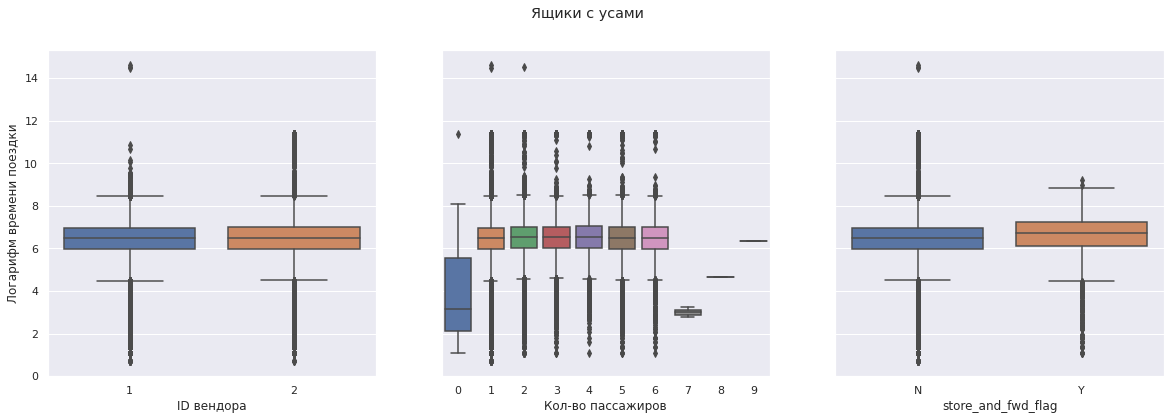

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(20,6))

sns.boxplot(data=X_train, x='vendor_id', y=y_train, ax=axs[0])
axs[0].set_ylabel('Логарифм времени поездки')
axs[0].set_xlabel('ID вендора')

sns.boxplot(data=X_train, x='passenger_count', y=y_train, ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_yticklabels('')
axs[1].set_xlabel('Кол-во пассажиров')

sns.boxplot(data=X_train, x='store_and_fwd_flag', y=y_train, ax=axs[2])
axs[2].set_ylabel('')
axs[2].set_yticklabels('')
axs[2].set_xlabel('store_and_fwd_flag')

fig.suptitle('Ящики с усами')
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
X_train['vendor_id'] = X_train['vendor_id'].astype("category").cat.codes
X_train['store_and_fwd_flag'] = X_train['store_and_fwd_flag'].astype("category").cat.codes

X_test['vendor_id'] = X_test['vendor_id'].astype("category").cat.codes
X_test['store_and_fwd_flag'] = X_test['store_and_fwd_flag'].astype("category").cat.codes

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Во всех признаках присутствует много выбросов, а различия между разными классами незначительные (не считая 0, 7, 8, 9 классов второго признака). Скорее всего, включение этих признаков не даст особых результатов.

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
cat = ['weekday', 'months', 'is_anomaly_first', 'is_anomaly_second',
       'traffic_jam', 'free_road', 'first_started', 'second_started',
       'first_finished', 'second_finished', 'start_zone', 'finish_zone']
num = ['log_haversine', 'hours', 'day_of_year']

column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47366205313428


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

*Значение метрики улучшилось незначительно, поэтому не будем включать эти новые признаки.*

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

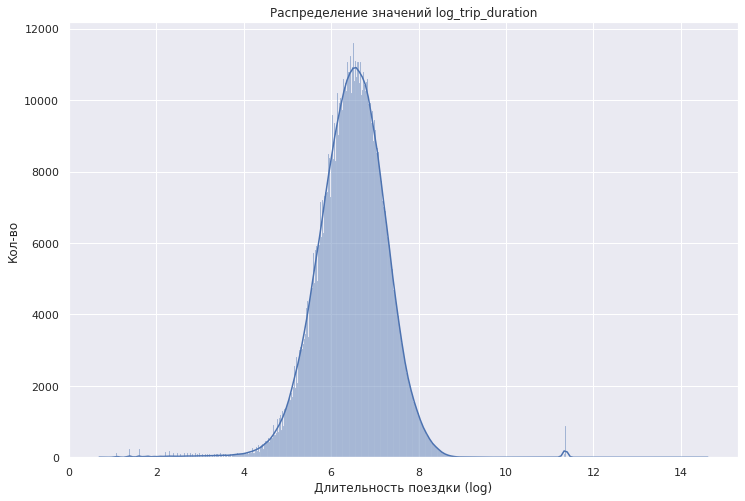

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(y_train, kde=True)
plt.xlabel('Длительность поездки (log)')
plt.ylabel('Кол-во')
plt.title('Распределение значений log_trip_duration')
plt.show()

In [ ]:
y_train = y_train[(y_train < y_train.mean() + 3*y_train.std()) & (y_train > y_train.mean() - 3*y_train.std())]
X_train = X_train.loc[y_train.index]

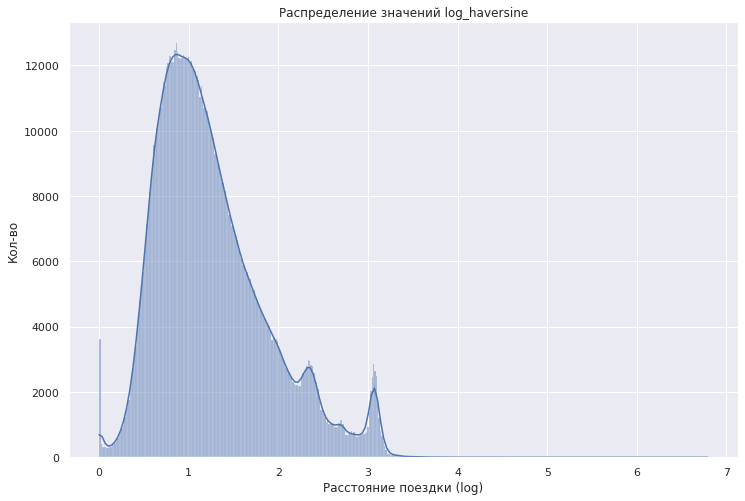

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(X_train['log_haversine'], kde=True)
plt.xlabel('Расстояние поездки (log)')
plt.ylabel('Кол-во')
plt.title('Распределение значений log_haversine')
plt.show()

In [ ]:
X_train = X_train[(X_train["log_haversine"] > 0.01) & (X_train["log_haversine"] < 3.6)]
y_train = y_train.loc[X_train.index]

In [ ]:
residuals = y_train - pipeline.predict(X_train)

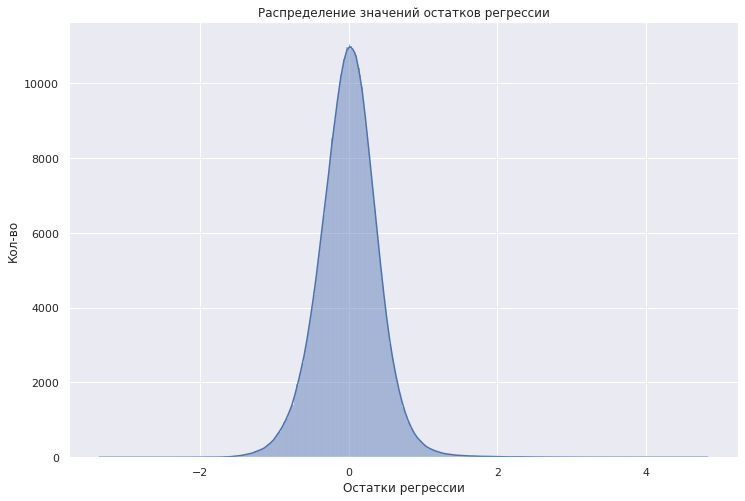

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(residuals, kde=True)
plt.xlabel('Остатки регрессии')
plt.ylabel('Кол-во')
plt.title('Распределение значений остатков регрессии')
plt.show()

In [ ]:
y_train = y_train.loc[
    (residuals < residuals.mean() + 3*residuals.std()) &
    (residuals > residuals.mean() - 3*residuals.std())
]

X_train = X_train.loc[
    (residuals < residuals.mean() + 3*residuals.std()) &
    (residuals > residuals.mean() - 3*residuals.std())
]

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
X_train[cat].nunique()

weekday               7
months                6
is_anomaly_first      2
is_anomaly_second     2
traffic_jam           2
free_road             2
first_started         2
second_started        2
first_finished        2
second_finished       2
start_zone           24
finish_zone          25
dtype: int64

In [ ]:
X_train['start_zone'].value_counts()

 8     157100
 15    148560
 9     122128
 7      93506
-1      82662
 22     66175
 16     51834
 2      42351
 1      41385
 10     40241
 0      38389
 14     35906
 17     35074
 21     14357
 23     10961
 3       5063
 6       4550
 13      4452
 18      2303
 19      1442
 20      1422
 12      1340
 11       416
 4          5
Name: start_zone, dtype: int64

In [ ]:
X_train['finish_zone'].value_counts()

 15    136823
 8     133291
-1     127906
 9     108554
 7      76411
 22     66223
 16     50345
 14     39192
 0      39062
 10     38710
 2      37500
 1      36754
 17     34739
 23     18137
 21     15969
 3       8469
 6       8187
 13      8152
 18      4698
 19      4617
 12      3356
 20      3291
 11      1188
 4         37
 5         11
Name: finish_zone, dtype: int64

In [ ]:
X_train.loc[X_train['start_zone'].isin([5, 4, 11, 12, 19, 20, 18]), 'start_zone'] = 100
X_train.loc[X_train['finish_zone'].isin([5, 4, 11, 12, 19, 20, 18]), 'start_zone'] = 100


X_test.loc[X_test['start_zone'].isin([5, 4, 11, 12, 19, 20, 18]), 'start_zone'] = 100
X_test.loc[X_test['finish_zone'].isin([5, 4, 11, 12, 19, 20, 18]), 'start_zone'] = 100

In [ ]:
X_train['start_zone'].value_counts()

 8      155350
 15     147153
 9      120991
 7       90025
-1       79580
 22      65818
 16      51538
 2       41822
 1       40576
 10      39837
 0       37790
 14      35395
 17      34827
 100     22269
 21      14154
 23      10921
 3        5029
 13       4277
 6        4270
Name: start_zone, dtype: int64

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [ ]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.4739660490293403


**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
len(column_transformer.feature_names_in_)

25

In [ ]:
len(column_transformer.get_feature_names_out())

76

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Lasso())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.7936503543064792


С начальными параметрами моделей, Ridge модель показала себя гораздо лучше.

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])

X_train_val = column_transformer.fit_transform(X_train_val)
X_val = column_transformer.transform(X_val)

Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

alpha_values_ridge = np.logspace(-5, 5, 15)
params = {'alpha': alpha_values_ridge}

ridge_grid = GridSearchCV(Ridge(), params, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_grid.fit(X_train_val, y_train_val)
ridge_grid.best_params_

{'alpha': 0.0002682695795279727}

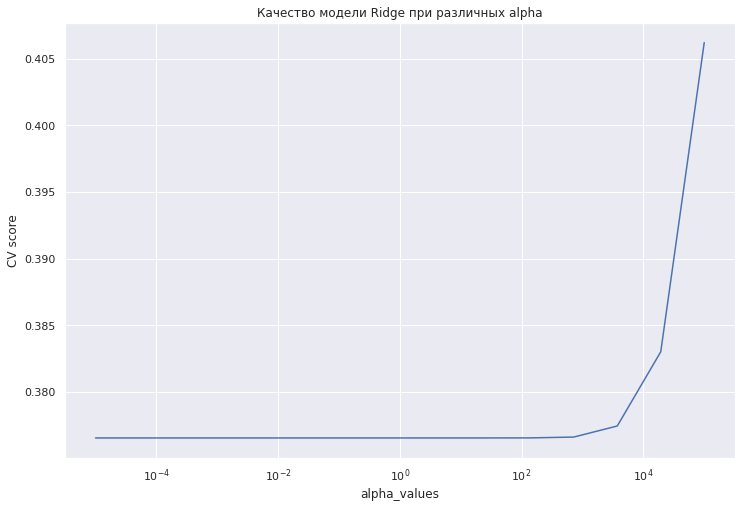

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(alpha_values_ridge, -ridge_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha_values')
plt.ylabel('CV score')
plt.title('Качество модели Ridge при различных alpha')
plt.show()

In [ ]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Ridge(ridge_grid.best_params_['alpha']))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47396585311329215


Lasso

In [ ]:
alpha_values_lasso = np.logspace(-5, 0, 10)
params = {'alpha': alpha_values_lasso}

lasso_grid = GridSearchCV(Lasso(), params, scoring='neg_root_mean_squared_error')

In [ ]:
lasso_grid.fit(X_train_val, y_train_val)
lasso_grid.best_params_

{'alpha': 1e-05}

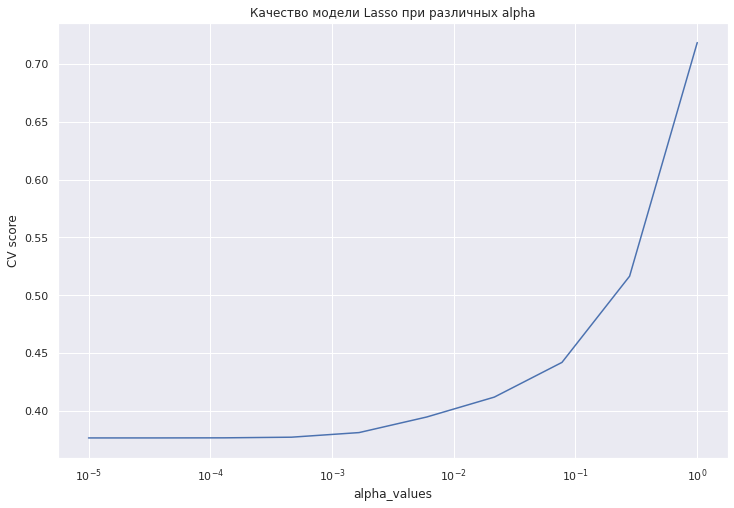

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(alpha_values_lasso, -lasso_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha_values')
plt.ylabel('CV score')
plt.title('Качество модели Lasso при различных alpha')
plt.show()

In [ ]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Lasso(lasso_grid.best_params_['alpha']))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47396284064238997


Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
alpha_zeros = {}
score = []
for a in alpha_values_lasso:
    column_transformer = ColumnTransformer([
      ('encoder', OneHotEncoder(), cat),
      ('scaler', StandardScaler(), num)
    ])
        
    pipeline = Pipeline([
        ('transform', column_transformer),
        ('model', Lasso(a))
    ])

    model = pipeline.fit(X_train, y_train)
    n_zeros = model.steps[-1][-1].coef_ == 0
    alpha_zeros[a] = sum(n_zeros)

    y_pred = model.predict(X_test)
    score.append(mean_squared_error(y_test, y_pred, squared=False))

In [ ]:
alpha_zeros

{1e-05: 9,
 3.5938136638046256e-05: 12,
 0.0001291549665014884: 16,
 0.0004641588833612782: 26,
 0.0016681005372000592: 40,
 0.005994842503189409: 57,
 0.021544346900318846: 71,
 0.07742636826811278: 75,
 0.2782559402207126: 75,
 1.0: 76}

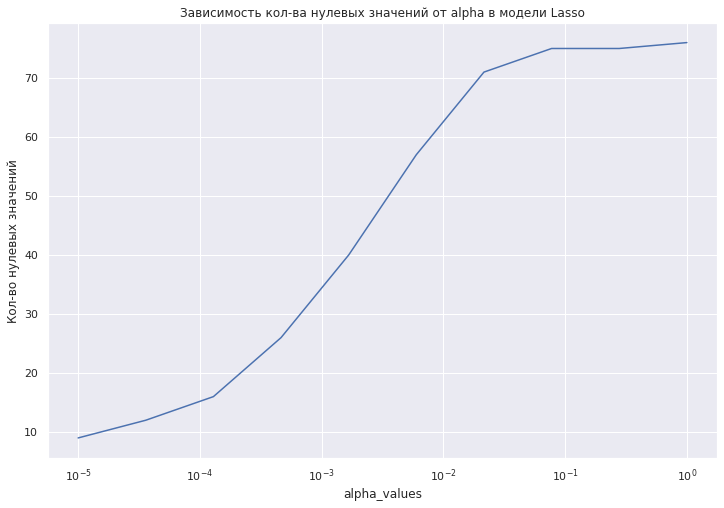

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(alpha_values_lasso, alpha_zeros.values())
plt.xscale('log')
plt.xlabel('alpha_values')
plt.ylabel('Кол-во нулевых значений')
plt.title('Зависимость кол-ва нулевых значений от alpha в модели Lasso')
plt.show()

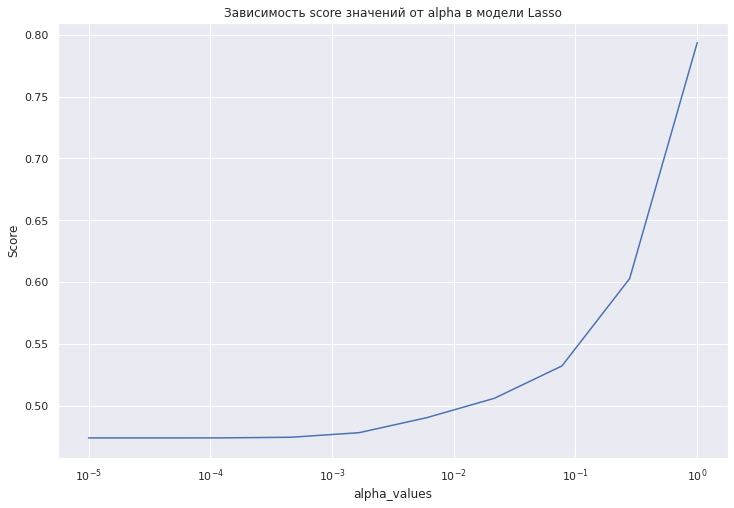

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(alpha_values_lasso, score)
plt.xscale('log')
plt.xlabel('alpha_values')
plt.ylabel('Score')
plt.title('Зависимость score значений от alpha в модели Lasso')
plt.show()

Если мы хотим с помощью Lasso избавиться хотя бы от половины признаков, то качество ухудшится всего на пару сотых, что вполне приемлемо.

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
pairs_index = X_train.groupby(['start_zone', 'finish_zone']).count()['id'].sort_values()[-100:].index

In [ ]:
top_pairs = list(zip(pairs_index.get_level_values(0), pairs_index.get_level_values(1)))

In [ ]:
X_train['top_hundred_pairs'] = -1
X_test['top_hundred_pairs'] = -1

for i in range(100):
    X_train.loc[
        (X_train['start_zone'] == top_pairs[i][0]) &
        (X_train['finish_zone'] == top_pairs[i][1]),
        'top_hundred_pairs'
    ] = i

    X_test.loc[
        (X_test['start_zone'] == top_pairs[i][0]) &
        (X_test['finish_zone'] == top_pairs[i][1]),
        'top_hundred_pairs'
    ] = i

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), cat),
    ('scaler', StandardScaler(), num)
])
    
pipeline = Pipeline([
    ('transform', column_transformer),
    ('model', Lasso(lasso_grid.best_params_['alpha']))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

RMSE: 0.47396284064238997
